# Installing Libraries

In [1]:
%pip install pandas matplotlib seaborn scikit-learn


  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/fc/a5/4d82be566f069d7a9a702dcdf6f9106df0e0b042e738043c0cc7ddd7e3f6/pandas-2.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached pandas-2.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/01/75/6c7ce560e95714a10fcbb3367d1304975a1a3e620f72af28921b796403f3/matplotlib-3.9.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached matplotlib-3.9.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Obtaining dependency information fo

## Loading Data

In [9]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir('..')
print("Current working directory:", os.getcwd())
sys.path.append('/home/amr/project/10-Academy/investment_analysis')

from DB_Connection.connection import PostgresConnection
from src.utils import missing_values_table, convert_bytes_to_megabytes

Current working directory: /
Connected to PostgreSQL database!
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1        

## Loading Data

In [10]:
db = PostgresConnection(dbname="telecom_db", user="postgres", password="password")
db.connect()

query = "SELECT * FROM xdr_data"
result = db.execute_query(query)

#convert the result to a pandas Data Frame

df = pd.DataFrame(result, columns=[desc[0] for desc in db.cursor.description])

print(df.head())

db.close_connection()

Connected to PostgreSQL database!
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...         

Checking for missed Values

In [11]:
missing_values_df = missing_values_table(df)
print('Missing values in df:')

print(missing_values_df)

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.
Missing values in df:
                                          Missing Values  % of Total Values  \
Nb of sec with 37500B < Vol UL                    130254               86.8   
Nb of sec with 6250B < Vol UL < 37500B            111843               74.6   
Nb of sec with 125000B < Vol DL                    97538               65.0   
TCP UL Retrans. Vol (Bytes)                        96649               64.4   
Nb of sec with 31250B < Vol DL < 125000B           93586               62.4   
Nb of sec with 1250B < Vol UL < 6250B              92894               61.9   
Nb of sec with 6250B < Vol DL < 31250B             88317               58.9   
TCP DL Retrans. Vol (Bytes)                        88146               58.8   
HTTP UL (Bytes)                                    81810               54.5   
HTTP DL (Bytes)                                    81474               54.3   
Avg RTT DL (ms)       

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

## Information about top handsets

In [14]:
# Top 10 headers
top_10_handsets = df['Handset Type'].value_counts().head(10)
print('Top 10 handsets:')
print(top_10_handsets)

Top 10 handsets:
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [13]:
#top 3 hadsets manufacturers
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
print('Top 3 handset manufacturers:')
print(top_3_manufacturers)

Top 3 handset manufacturers:
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [15]:
# Top 5 Handsets per Top 3 Manufacturers
for manufacturer in top_3_manufacturers.index:
    top_5_handsets = df[df['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    print(f'Top 5 handsets for {manufacturer}:')
    print(top_5_handsets)

Top 5 handsets for Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64
Top 5 handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64
Top 5 handsets for Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


##  Aggregate User Behavior Data

In [18]:
# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Aggregate user behavior data
user_behavior = df.groupby('IMSI').agg({
    'Bearer Id': 'count',  # Number of xDR sessions
    'Dur. (ms)': 'sum',  # Session duration
    'Total DL (Bytes)': 'sum',  # Total download data
    'Total UL (Bytes)': 'sum',  # Total upload data
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum'
}).reset_index()

# Rename columns for clarity
user_behavior.rename(columns={
    'Bearer Id': 'xDR_sessions',
    'Dur. (ms)': 'session_duration',
    'Total DL (Bytes)': 'total_DL',
    'Total UL (Bytes)': 'total_UL'
}, inplace=True)

# Calculate total data volume for each application
user_behavior['total_data_volume'] = user_behavior['total_DL'] + user_behavior['total_UL']

print('Aggregated user behavior data:')
print(user_behavior.head())

Aggregated user behavior data:
           IMSI  xDR_sessions  session_duration     total_DL    total_UL  \
0  2.040471e+14             1          869844.0   78697597.0  60456049.0   
1  2.040808e+14             1          877385.0  194828056.0  37295915.0   
2  2.082001e+14             1           86019.0   31376981.0  53794658.0   
3  2.082001e+14             1           86254.0  392918313.0  33583272.0   
4  2.082001e+14             2          573923.0  961767023.0  71325004.0   

   Social Media DL (Bytes)  Social Media UL (Bytes)  Google DL (Bytes)  \
0                1500145.0                  45943.0          5985089.0   
1                 668596.0                  46628.0          8572779.0   
2                3073697.0                  49084.0           603691.0   
3                2542767.0                  34337.0         10699827.0   
4                3326811.0                  99905.0          9118088.0   

   Google UL (Bytes)  Email DL (Bytes)  Email UL (Bytes)  Youtube D

# 1.2 Exploratory Data Analysis

1. Describe All Relevant Variables and Data Types

In [19]:
# describe all relevant variables and data types
print(user_behavior.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107265 entries, 0 to 107264
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   IMSI                     107265 non-null  float64
 1   xDR_sessions             107265 non-null  int64  
 2   session_duration         107265 non-null  float64
 3   total_DL                 107265 non-null  float64
 4   total_UL                 107265 non-null  float64
 5   Social Media DL (Bytes)  107265 non-null  float64
 6   Social Media UL (Bytes)  107265 non-null  float64
 7   Google DL (Bytes)        107265 non-null  float64
 8   Google UL (Bytes)        107265 non-null  float64
 9   Email DL (Bytes)         107265 non-null  float64
 10  Email UL (Bytes)         107265 non-null  float64
 11  Youtube DL (Bytes)       107265 non-null  float64
 12  Youtube UL (Bytes)       107265 non-null  float64
 13  Netflix DL (Bytes)       107265 non-null  float64
 14  Netf

2 Variable Transformations

In [20]:
# Segment users into decile classes based on session duration
user_behavior['decile_class'] = pd.qcut(user_behavior['session_duration'], 10, labels=False)

# Compute total data (DL+UL) per decile class
decile_data = user_behavior.groupby('decile_class').agg({
    'total_DL': 'sum',
    'total_UL': 'sum'
}).reset_index()

decile_data['total_data'] = decile_data['total_DL'] + decile_data['total_UL']

print('Decile data:')
print(decile_data)

Decile data:
   decile_class      total_DL      total_UL    total_data
0             0  5.007134e+12  4.507508e+11  5.457884e+12
1             1  5.599315e+12  5.058663e+11  6.105181e+12
2             2  6.008971e+12  5.451664e+11  6.554138e+12
3             3  5.665632e+12  5.120978e+11  6.177730e+12
4             4  4.649388e+12  4.209930e+11  5.070381e+12
5             5  5.916943e+12  5.354669e+11  6.452409e+12
6             6  5.668698e+12  5.075130e+11  6.176211e+12
7             7  7.189124e+12  6.539729e+11  7.843097e+12
8             8  8.557977e+12  7.728156e+11  9.330793e+12
9             9  1.367532e+13  1.240032e+12  1.491535e+13


3.  Analyze Basic Metrics

In [21]:
# Analyze Basic Metrics
print(user_behavior.describe())

               IMSI   xDR_sessions  session_duration      total_DL  \
count  1.072650e+05  107265.000000      1.072650e+05  1.072650e+05   
mean   2.082016e+14       1.389092      1.459355e+05  6.333706e+08   
std    2.534986e+10       0.809545      1.863518e+05  4.643722e+08   
min    2.040471e+14       0.000000      7.142000e+03  8.827082e+06   
25%    2.082010e+14       1.000000      7.041100e+04  3.148031e+08   
50%    2.082015e+14       1.000000      1.024500e+05  5.700628e+08   
75%    2.082018e+14       2.000000      1.727990e+05  8.070673e+08   
max    2.140743e+14      18.000000      1.855375e+07  8.156743e+09   

           total_UL  Social Media DL (Bytes)  Social Media UL (Bytes)  \
count  1.072650e+05             1.072650e+05            107265.000000   
mean   5.728499e+07             2.500966e+06             45867.795898   
std    3.564266e+07             1.887405e+06             34710.404878   
min    2.866892e+06             1.200000e+01                 0.000000   
25% 

4. Non-Graphical Univariate Analysis

In [22]:
# Non-Graphical Univariate Analysis
dispersion_params = user_behavior.describe().loc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
print('Dispersion parameters:')
print(dispersion_params)

Dispersion parameters:
              IMSI  xDR_sessions  session_duration      total_DL  \
mean  2.082016e+14      1.389092      1.459355e+05  6.333706e+08   
std   2.534986e+10      0.809545      1.863518e+05  4.643722e+08   
min   2.040471e+14      0.000000      7.142000e+03  8.827082e+06   
25%   2.082010e+14      1.000000      7.041100e+04  3.148031e+08   
50%   2.082015e+14      1.000000      1.024500e+05  5.700628e+08   
75%   2.082018e+14      2.000000      1.727990e+05  8.070673e+08   
max   2.140743e+14     18.000000      1.855375e+07  8.156743e+09   

          total_UL  Social Media DL (Bytes)  Social Media UL (Bytes)  \
mean  5.728499e+07             2.500966e+06             45867.795898   
std   3.564266e+07             1.887405e+06             34710.404878   
min   2.866892e+06             1.200000e+01                 0.000000   
25%   3.639251e+07             1.174932e+06             21596.000000   
50%   4.678050e+07             2.264261e+06             41537.000000   


5. Graphical Univariate Analysis

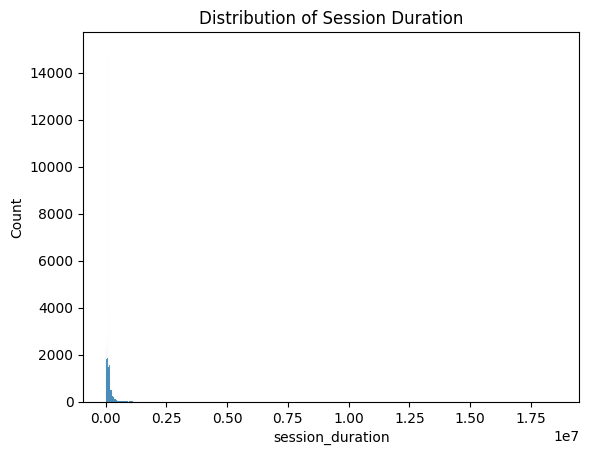

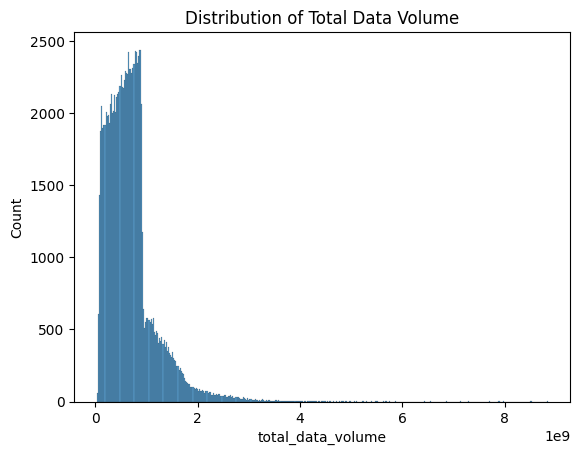

In [23]:

# Distribution of session duration
sns.histplot(user_behavior['session_duration'])
plt.title('Distribution of Session Duration')
plt.show()

# Distribution of total data volume
sns.histplot(user_behavior['total_data_volume'])
plt.title('Distribution of Total Data Volume')
plt.show()

6. Bivariate Analysis

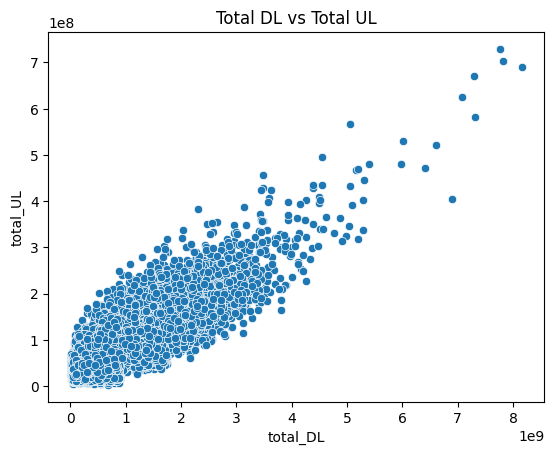

In [24]:
# Explore the relationship between each application and the total DL+UL data.
sns.scatterplot(x='total_DL', y='total_UL', data=user_behavior)
plt.title('Total DL vs Total UL')
plt.show()

7. Correlation Analysis

In [25]:
# Compute a correlation matrix for the specified variables.
correlation_matrix = user_behavior[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']].corr()
print('Correlation matrix:')
print(correlation_matrix)

Correlation matrix:
                         Social Media DL (Bytes)  Google DL (Bytes)  \
Social Media DL (Bytes)                 1.000000           0.585166   
Google DL (Bytes)                       0.585166           1.000000   
Email DL (Bytes)                        0.585501           0.586744   
Youtube DL (Bytes)                      0.582765           0.586121   
Netflix DL (Bytes)                      0.583639           0.584899   
Gaming DL (Bytes)                       0.580892           0.583371   
Other DL (Bytes)                        0.582819           0.584492   

                         Email DL (Bytes)  Youtube DL (Bytes)  \
Social Media DL (Bytes)          0.585501            0.582765   
Google DL (Bytes)                0.586744            0.586121   
Email DL (Bytes)                 1.000000            0.585834   
Youtube DL (Bytes)               0.585834            1.000000   
Netflix DL (Bytes)               0.583361            0.585451   
Gaming DL (Bytes)    

8.Dimensionality Reduction

In [26]:
# Perform a principal component analysis (PCA) to reduce the dimensions of your data.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(user_behavior[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']])
print('PCA result:')
print(pca_result)

PCA result:
[[-5.35412674e+08  2.56040209e+08]
 [-3.83697904e+08  2.15109696e+08]
 [-4.74574996e+08  3.51670420e+08]
 ...
 [-3.26299170e+08  1.30334236e+08]
 [ 1.25432420e+08 -1.36293358e+08]
 [-2.26038883e+07 -5.23251148e+07]]
